In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import urllib.request 
import os
from tqdm.notebook import tqdm

Example targeting UBO2014

in this example we download [UBO2014](https://cg.cs.uni-bonn.de/btfdb) and explore it

## Download

In [3]:
categories = ["carpet", "fabric", "felt", "leather", "stone", "wallpaper", "wood"]
n_instances = 12

In [4]:
ds_dir = os.path.join("..","dataset")
if not os.path.isdir(ds_dir):
    os.mkdir(os.path.abspath(ds_dir))
ds_dir = os.path.join(ds_dir,"UBO2014")
if not os.path.isdir(ds_dir):
    os.mkdir(os.path.abspath(ds_dir))

In [ ]:
url_prefix = "https://cg.cs.uni-bonn.de/btf/UBO2014"
# to get the resampled data instead ADD _resampled at the start of url_suffix 
url_suffix = "_W400xH400_L151xV151.btf"
for c in tqdm(categories):
    for n in tqdm(range(n_instances)):
        name = c + str(n + 1).zfill(2)
        url = "/".join((url_prefix, c, name + url_suffix))
        filename = os.path.join(ds_dir, name + ".btf")
        exists = os.path.exists(filename)
        if not exists:
            urllib.request.urlretrieve(url, filename)
        else:
            print("File {} already downloaded".format(filename))

## Loading and exploration

In [24]:
from btf_extractor import Ubo2014
import numpy as np
import sys

# importing relative modules
module_path = os.path.abspath(os.path.join('..', "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

import utils 

We load the dataset using the python module [btf_extractor](https://pypi.org/project/btf-extractor/)
the samples are in hdr format

In [25]:
btf_path = os.path.join(ds_dir, "leather11.btf")
btf = Ubo2014(btf_path)

In [26]:
angles = list(btf.angles_set)
angles = np.array(angles)
print(angles)

[[ 60.  270.   60.  135. ]
 [ 60.  300.   23.5 150. ]
 [ 45.  180.   45.   20. ]
 ...
 [ 37.5  90.   60.   60. ]
 [ 30.  165.   45.  180. ]
 [ 60.  135.   52.5 147.5]]


### Images

In [27]:
import matplotlib.pyplot as plt

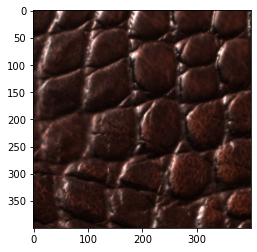

In [28]:
image = btf.angles_to_image(*angles[0])
# images are stored as BGR, ::-1 to flip the to RGB
image = image[...,::-1]
plt.imshow(image)

Applying gamma correction to "convert" from HDR, using gamma of 2.2

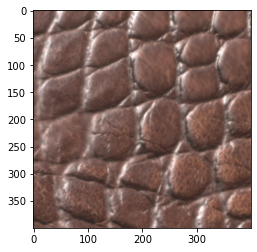

In [29]:
plt.imshow(utils.gamma_correction(image))

### Angles
Angles are stored as [Spherical coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system) $(r,\theta, \varphi)$

where $r$ is the radius, $\theta$ inclination and $\varphi$ azimuth

each sample is described by 2 directions $\omega_i , \omega_o$, the first for the light direction and the second for the view direction

In [30]:
print(utils.spherical2dir(angles[0,2], angles[0,3]))

[-0.61237244  0.61237244  0.5       ]


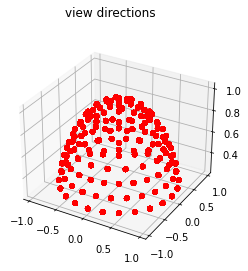

In [31]:
v_dirs = utils.spherical2dir(angles[:,2], angles[:,3])
ax = plt.axes(projection='3d')

ax.scatter3D(v_dirs[:, 0], v_dirs[:, 1], v_dirs[:, 2], c='red')
plt.suptitle("view directions")
plt.show()

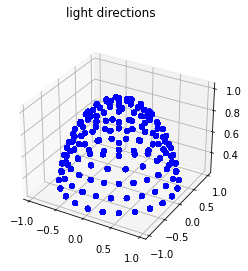

In [32]:
l_dirs = utils.spherical2dir(angles[:,0], angles[:,1])
ax = plt.axes(projection='3d')

ax.scatter3D(l_dirs[:, 0], l_dirs[:, 1], l_dirs[:, 2], c='blue')
plt.suptitle("light directions")
plt.show()